In [1]:
!pip install pyspark==3.0.1 py4j==0.10.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 15.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612223 sha256=e67396668ab4e5f710ccac163b03caa145dc372c885f6ec7ff2bad9f7da19986
  Stored in directory: /root/.cache/pip/wheels/19/b0/c8/6cb894117070e130fc44352c2a13f15b6c27e440d04a84fb48
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

In [3]:
data = spark.read.csv(
    'bestsellers with categories.csv',
    sep=',',
    header=True,
    inferSchema=True
)

data.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- User Rating: double (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)



In [4]:
from pyspark.sql.types import *

data_schema = [

               StructField('Name', StringType(), True),
               StructField('Author', StringType(), True),
               StructField('User Rating', DoubleType(), True),
               StructField('Reviews', IntegerType(), True),
               StructField('Price', IntegerType(), True),
               StructField('Year', IntegerType(), True),
               StructField('Genre', StringType(), True),

            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv(
    'bestsellers with categories.csv',
    sep=',',
    header=True,
    schema=final_struc
)

data.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- User Rating: double (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)



In [5]:
column_names_and_types = data.dtypes

for column_name, column_type in column_names_and_types:
    print(f"Column: {column_name}, Type: {column_type}")

Column: Name, Type: string
Column: Author, Type: string
Column: User Rating, Type: double
Column: Reviews, Type: int
Column: Price, Type: int
Column: Year, Type: int
Column: Genre, Type: string


In [6]:
print(data.head(5))

[Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction'), Row(Name='11/22/63: A Novel', Author='Stephen King', User Rating=4.6, Reviews=2052, Price=22, Year=2011, Genre='Fiction'), Row(Name='12 Rules for Life: An Antidote to Chaos', Author='Jordan B. Peterson', User Rating=4.7, Reviews=18979, Price=15, Year=2018, Genre='Non Fiction'), Row(Name='1984 (Signet Classics)', Author='George Orwell', User Rating=4.7, Reviews=21424, Price=6, Year=2017, Genre='Fiction'), Row(Name='5,000 Awesome Facts (About Everything!) (National Geographic Kids)', Author='National Geographic Kids', User Rating=4.8, Reviews=7665, Price=12, Year=2019, Genre='Non Fiction')]


In [7]:
print(data.first())

Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction')


In [8]:
# Отримати опис датасету
description = data.describe()

# Вивести опис датасету
description.show()

+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|summary|                Name|          Author|        User Rating|           Reviews|             Price|              Year|      Genre|
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|  count|                 550|             550|                550|               550|               550|               550|        550|
|   mean|                null|            null|  4.618363636363641|11953.281818181818|              13.1|            2014.0|       null|
| stddev|                null|            null|0.22698036502519656|11731.132017431892|10.842261978422364|3.1651563841692782|       null|
|    min|"The Plant Parado...|Abraham Verghese|                3.3|                37|                 0|              2009|    Fiction|
|    max|You Are a Badass:...|    Zhi Gan

In [9]:
# Вивести список стовпців
print(data.columns)

['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']


In [10]:
# Вивести загальну кількість рядків даних
print(data.count())

550


In [11]:
# Змінити назви всіх колонок
new_column_names = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
data = data.toDF(*new_column_names)

# Вивести оновлений DataFrame з новими назвами колонок
data.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                name|              author|user_rating|reviews|price|year|      genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [12]:
from pyspark.sql.functions import desc

# Впорядкувати дані за стовпцем user_rating у спадаючому порядку
sorted_data = data.orderBy(desc("user_rating"))

# Отримати першого автора з відсортованого списку (це буде автор з найвищим рейтингом)
top_author = sorted_data.select("author").first()

# Вивести ім'я автора з найвищим рейтингом
if top_author:
    print("Автор з найвищим рейтингом:", top_author[0])
else:
    print("Не вдалося знайти автора з найвищим рейтингом.")



Автор з найвищим рейтингом: Bill Martin Jr.


In [13]:
from pyspark.sql.functions import asc

# Впорядкувати дані за стовпцем user_rating у зростаючому порядку
sorted_data = data.orderBy(asc("user_rating"))

# Отримати першого автора з відсортованого списку (це буде автор з найнижчим рейтингом)
bottom_author = sorted_data.select("author").first()

# Вивести ім'я автора з найнижчим рейтингом
if bottom_author:
    print("Автор з найнижчим рейтингом:", bottom_author[0])
else:
    print("Не вдалося знайти автора з найнижчим рейтингом.")

Автор з найнижчим рейтингом: J.K. Rowling


In [14]:


# Впорядкувати дані за стовпцем Reviews у спадаючому порядку
sorted_data = data.orderBy(desc("Reviews"))

# Отримати першого автора з відсортованого списку (це буде автор з найбільшою кількістю рецензій)
top_reviews_author = sorted_data.select("author").first()

# Вивести ім'я автора з найбільшою кількістю рецензій
if top_reviews_author:
    print("Автор з найбільшою кількістю рецензій:", top_reviews_author[0])
else:
    print("Не вдалося знайти автора з найбільшою кількістю рецензій.")


Автор з найбільшою кількістю рецензій: Delia Owens


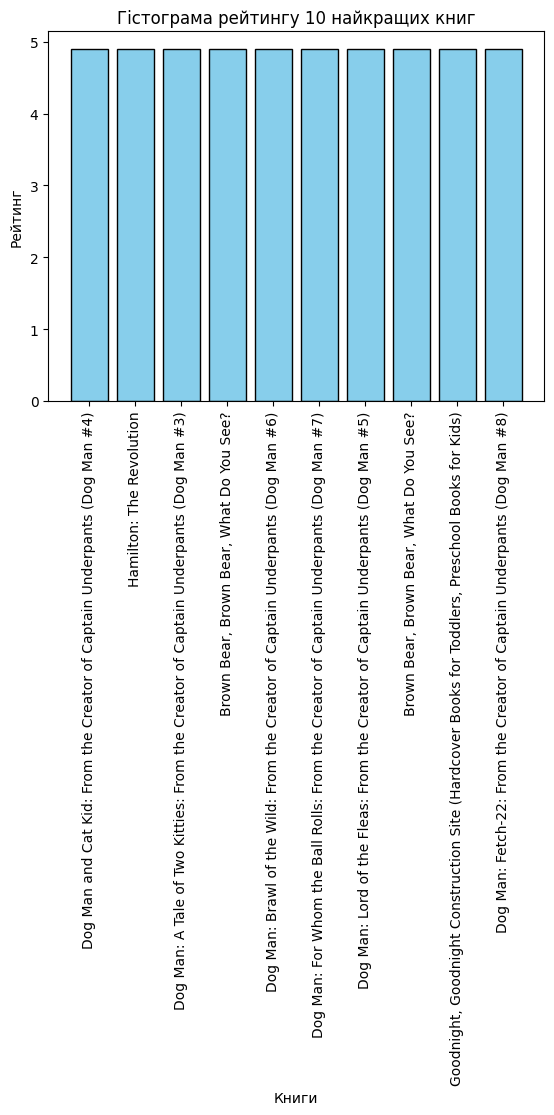

In [22]:
import matplotlib.pyplot as plt

# Відібрати книги з найбільшим рейтингом (10 книг)
top_rated_books = data.orderBy(desc("user_rating")).limit(10)

# Отримати значення рейтингу та назви книг
ratings = top_rated_books.select("user_rating").rdd.flatMap(lambda x: x).collect()
book_names = top_rated_books.select("name").rdd.flatMap(lambda x: x).collect()

# Створити список індексів для стовпчиків
indices = range(len(ratings))

# Побудувати графік з 10 стовпчиками
plt.bar(indices, ratings, color='skyblue', edgecolor='black')

# Додати назву графіка та назви вісей
plt.title('Гістограма рейтингу 10 найкращих книг')
plt.xlabel('Книги')
plt.ylabel('Рейтинг')

# Підписи на осі X
plt.xticks(indices, book_names, rotation='vertical')

# Відображення графіка
plt.show()




In [23]:
from pyspark.sql.functions import corr

# Обчислити коефіцієнти кореляції між стовпцями 'user_rating', 'reviews' і 'price'
correlation_matrix = data.select(corr('user_rating', 'reviews').alias('correlation_user_rating_reviews'),
                                 corr('user_rating', 'price').alias('correlation_user_rating_price'),
                                 corr('reviews', 'price').alias('correlation_reviews_price'))


correlation_matrix.show()


+-------------------------------+-----------------------------+-------------------------+
|correlation_user_rating_reviews|correlation_user_rating_price|correlation_reviews_price|
+-------------------------------+-----------------------------+-------------------------+
|           -0.00172901425554...|         -0.13308628728088093|     -0.10918188342780513|
+-------------------------------+-----------------------------+-------------------------+



In [24]:
import pandas as pd

# Отримати матрицю кореляції як Pandas DataFrame
correlation_matrix_pd = correlation_matrix.toPandas()

# Створити стилі для кольорового підкреслення
styled_corr = correlation_matrix_pd.style.background_gradient(cmap='coolwarm')

# Вивести стилізовану матрицю кореляції
styled_corr


,correlation_user_rating_reviews,correlation_user_rating_price,correlation_reviews_price
0,-0.001729,-0.133086,-0.109182
